In [1]:
%run "support functions - graphs.ipynb"
%run "support_functions.ipynb"
%run "support_functions_0.ipynb"

Automatically created module for IPython interactive environment


Automatically created module for IPython interactive environment


#### Предсказываем исходы стационарного лечения ковид для статьи в JPM

#### 1. Пишу функцию, которая сохраняет прогнозы для всех пациентов для 2 ЦП (для каждой ЦП своя модель) для моделей LR, XGB, Fedot на 2 типах датасетов - с данными предсказанными ДБС и без них.

In [2]:
covid_data=pd.read_csv("Data/cleared_dataset_interval_duration_7_t0_7_with_categor.csv")

In [3]:
covid_data.head()

,pat,t_point,К+ (вена),ЧДД,Пациент с COVID-19?,Положительный результат лабораторного исследования на наличие РНК SARS-CoV-2 с применением методов амплификации нуклеиновых кислот вне зависимости от клинических проявлений,Протромбин (по Квику),ИБС,Незрелые гранулоциты (IG#),Билирубин общий,ранее_болел_ковидом,PLT- Тромбоциты,Кашель,МНО,вакцинировался_от_гриппа,RBC- Эритроциты,ОДН с необх. респираторной поддержки (ИВЛ),MCV- Средн.объем эритроцитов,PDW- Индекс расп.по объему тр.,Нейтрофилы#,С-реактивный белок (СРБ) колич.,ощущение заложенности в грудной клетке,Нейтрофилы%,Состояние_пациента,Белок (скрининг-тест полоска),Альбумин,головная боль,АЧТВ,Моноциты#,Д-димер,Калий,Cтепень тяжести по КТ,МНО (э),Боль в горле,cad,HCT- Гематокрит,С-реактивный белок,вакцинировался_от_пневмонии,Эозинофилы#,ОАМ Глюкоза,Мочевина,ОАМ Кислотность (прибор),"температура тела выше 37,5 °C",насморк и другие катаральные симптомы,pneumonia,Креатинин,статус_ковида,Лимфоциты#,Наличие клинических проявлений тяжелой пневмонии,ОАМ Удельная плотность,Пневмония,Балл по NEWS,Лактат,P-LCR- Отнош.крупных тр. к общ.кол-ву,тип_дыхания,Пульс,Лимфоциты%,Слабость,Гранулоциты%,ОАМ Белок,Рост,АСТ,С-реактивный белок (СРБ),ОАМ Кетоновые тела,Вес,аносмия,Полиорганная недостаточность,ЧСС,Сатурация,Референтное время,Эозинофилы%,Прокальцитониновый тест,Кислородотерапия,Гранулоциты#,PCT- Тромбокрит,WBC- Лейкоциты,Фибриноген,Лактатдегидрогеназа,ОАМ Билирубин,ОАМ Эритроциты,возвращение из зарубежной поездки за 14 дней до появления симптомов,ОАМ Уробилиноген,Стойкая фебрильная лихоладка,Базофилы#,Общий белок,диарея,ОРДС,Базофилы%,Протромбиновое время,ОАМ Лейкоциты,Температура,АЛТ,dad,Ферритин,Септический шок,слабость.1,HGB- Гемоглобин,снижение_сознания,Площадь поверхности тела,Глюкоза,Процент поражения легочной ткани,MPV- Средн.объем тромбоцитов,степень_тяжести_течения,Моноциты%,Нестабильная гемодинамика,Незрелые гранулоциты (IG%),outcome,result,duration_treatment,duration_diseases,age,gender
0,GACAlяЯ,t_3,NaN,17.0,NaN,1,115.00,NaN,1.09,6.50,2,290.0,NaN,0.91,2,5.29,1,83.9,9.7,12.75,NaN,1,81.7,1,NaN,34.50,1,23.1,1.00,0.09,4.92,NaN,NaN,2,130.0,44.4,NaN,2,0.00,NaN,8.70,NaN,NaN,1,1,71.00,0,1.81,1,NaN,0,NaN,NaN,17.5,NaN,NaN,11.6,3,NaN,NaN,NaN,38.20,1.10,NaN,NaN,1,1,83.0,NaN,NaN,0.0,0.041,NaN,NaN,0.260,15.6,2.96,182.0,NaN,NaN,2,NaN,2,0.05,NaN,1,2,0.3,10.0,NaN,36.6,178.0,70.0,1243.8,1,1,149.0,0,NaN,6.80,NaN,9.1,1,6.4,2,7.0,0,1,29,29.0,60,1
1,GACAjцc,t_2,NaN,24.0,NaN,1,122.57,NaN,NaN,7.81,2,146.0,NaN,0.90,2,4.27,1,86.0,12.7,NaN,NaN,1,NaN,3,NaN,33.92,1,24.2,0.28,NaN,NaN,2.0,NaN,2,119.0,36.9,0.2,2,NaN,NaN,2.31,NaN,NaN,1,0,47.41,0,1.93,1,NaN,0,NaN,NaN,NaN,NaN,NaN,46.0,3,47.4,NaN,NaN,25.88,NaN,NaN,NaN,1,1,71.0,NaN,NaN,NaN,NaN,NaN,1.99,0.122,4.2,3.95,172.3,NaN,NaN,1,NaN,2,NaN,60.33,1,2,NaN,10.6,NaN,NaN,71.1,77.0,NaN,1,1,130.0,0,NaN,4.52,NaN,8.3,1,6.6,2,NaN,0,1,22,24.0,51,0
2,GACAjДя,t_5,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2,NaN,NaN,1.09,2,NaN,1,NaN,NaN,NaN,NaN,1,NaN,4,NaN,NaN,1,101.0,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,65.60,NaN,NaN,NaN,1,1,136.0,9497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,1,2,NaN,NaN,NaN,37.0,31.5,NaN,NaN,1,1,NaN,1,NaN,NaN,NaN,NaN,3,NaN,2,NaN,2,2,39,57.0,50,0
3,GACAM%},t_1,NaN,16.0,NaN,1,NaN,NaN,0.02,NaN,2,179.0,NaN,NaN,2,4.05,1,86.4,15.2,4.14,NaN,1,63.7,0,NaN,NaN,1,NaN,0.58,0.23,3.71,NaN,NaN,2,94.0,35.0,NaN,2,0.08,NaN,NaN,NaN,NaN,1,1,90.00,0,1.69,1,NaN,0,NaN,NaN,38.2,NaN,57.0,26.0,3,NaN,NaN,NaN,NaN,2.88,NaN,NaN,1,1,68.0,NaN,NaN,1.2,NaN,8.0,NaN,0.210,6.5,NaN,248.0,NaN,NaN,2,NaN,2,0.01,NaN,1,2,0.2,NaN,NaN,36.6,NaN,62.0,229.8,1,1,113.0,0,NaN,NaN,NaN,11.9,1,8.9,2,0.3,0,1,24,28.0,62,0
4,GACAm6<,t_0,NaN,20.0,NaN,1,86.00,NaN,0.10,9.00,1,286.0,NaN,1.11,1,3.99,0,80.5,10.8,7.43,NaN,1,85.4,1,0.2,38.30,0,28.9,0.37,0.25,4.84,1.0,NaN,1,120.0,32.1,NaN,1,0.00,0.0,5.40,5.5,NaN,0,1,43.00,0,0.89,1,1.021,0,NaN,NaN,22.9,NaN,82.0,10.2,1,NaN,NaN,165.0,77.10,14.95,0.0,78.0,1,0,65.0,NaN,NaN,0.0,0.038,NaN,N

In [4]:
covid_data.result.value_counts()

1    5837
2     729
0     254
Name: result, dtype: int64

In [5]:
covid_data.shape

(6820, 112)

In [6]:
paths=['t0t1_inference_v3.csv',
       't0t2_inference_v3.csv',
       't0t3_inference_v3.csv',
       't0t4_inference_v3.csv']

predicted_dinamic=pd.read_csv(f"Data/{paths[0]}") #.drop_duplicates(subset=['patient'])
predicted_dinamic.set_index("patient",inplace=True)
predicted_dinamic
for path in paths[1:]:
    t_point_inference=pd.read_csv(f"Data/{path}") #.drop_duplicates(subset=['patient'])
    t_point_inference.set_index("patient",inplace=True)
    t_point_inference.drop(["t_point","Unnamed: 0"],inplace=True,axis=1)
    predicted_dinamic=predicted_dinamic.join(t_point_inference)

predicted_dinamic.head()

,Unnamed: 0,PCT- Тромбокрит_1,RBC- Эритроциты_1,АЛТ_1,MPV- Средн.объем тромбоцитов_1,С-реактивный белок_1,Д-димер_1,Мочевина_1,Лактатдегидрогеназа_1,Лимфоциты#_1,Процент поражения легочной ткани_1,Сатурация_1,Моноциты#_1,MCV- Средн.объем эритроцитов_1,Нейтрофилы%_1,t_point,PCT- Тромбокрит_2,RBC- Эритроциты_2,АЛТ_2,MPV- Средн.объем тромбоцитов_2,С-реактивный белок_2,Д-димер_2,Мочевина_2,Лактатдегидрогеназа_2,Лимфоциты#_2,Процент поражения легочной ткани_2,Сатурация_2,Моноциты#_2,MCV- Средн.объем эритроцитов_2,Нейтрофилы%_2,PCT- Тромбокрит_3,RBC- Эритроциты_3,АЛТ_3,MPV- Средн.объем тромбоцитов_3,С-реактивный белок_3,Д-димер_3,Мочевина_3,Лактатдегидрогеназа_3,Лимфоциты#_3,Процент поражения легочной ткани_3,Сатурация_3,Моноциты#_3,MCV- Средн.объем эритроцитов_3,Нейтрофилы%_3,PCT- Тромбокрит_4,RBC- Эритроциты_4,АЛТ_4,MPV- Средн.объем тромбоцитов_4,С-реактивный белок_4,Д-димер_4,Мочевина_4,Лактатдегидрогеназа_4,Лимфоциты#_4,Процент поражения легочной ткани_4,Сатурация_4,Моноциты#_4,MCV- Средн.объем эритроцитов_4,Нейтрофилы%_4
patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GACAM$К,0,0.158554,4.791803,19.385501,6.887585,-28.100515,1.23,25.821572,370.906608,2.089219,34.236836,98.775127,0.491916,88.316770,59.416635,t1,0.108841,3.231391,167.257745,6.771806,10.164600,1.23,0.259459,463.820776,1.855970,40.183123,97.998401,0.513148,92.027889,85.913494,0.148236,3.760868,356.144497,7.797715,12.024806,1.23,6.350236,284.904436,0.943918,61.721982,94.760245,0.101591,86.895518,72.623114,0.212954,4.864363,63.706534,8.478225,12.024806,1.23,6.744183,522.731472,3.127284,49.947908,91.628151,0.448950,81.329759,49.887042
GACAjущ,1,0.188104,4.169863,18.089696,7.227469,23.745289,1.23,30.936481,481.314766,1.650772,30.150110,98.297981,0.338622,97.865481,65.572030,t1,0.155967,4.992857,76.280805,6.724730,12.024806,1.23,0.259459,269.663432,0.762575,75.000000,100.125152,0.354034,87.098624,49.234625,0.218692,3.196597,38.118602,8.858000,12.024806,1.23,4.055230,117.355699,1.259835,62.294933,95.421302,0.442079,87.803828,42.536977,0.134203,4.152203,147.642909,8.911192,12.600195,1.23,6.545453,326.230517,1.952187,7.632702,95.587147,0.078940,88.248632,68.928067
GACAmR>,2,0.283332,4.694145,116.747537,7.264853,17.334787,1.23,26.960480,292.390328,2.378293,55.374687,91.086667,0.512661,89.838050,49.650192,t1,0.125428,5.034029,14.036550,5.063741,7.915528,1.23,7.127816,225.557485,2.015770,75.000000,93.739612,0.370228,92.440965,59.904564,0.164412,3.949549,24.440441,6.431882,12.024806,1.23,9.862115,321.880933,1.024824,10.591879,94.909273,0.514910,85.911196,38.283892,0.277008,4.478760,70.534561,6.401271,12.024806,1.23,3.107099,98.349332,2.004753,80.718269,88.056956,0.789481,87.105269,42.743571
GACAm5',3,0.244950,5.321381,89.282091,7.181721,40.138156,1.23,5.124773,336.430310,1.464271,7.547567,94.812607,0.400573,93.065001,42.203759,t1,0.098573,4.665111,195.540673,5.343024,12.024806,1.23,0.259459,314.998384,2.131463,47.273902,100.715140,0.682313,81.138535,44.135834,0.131145,4.991423,87.676717,6.851695,12.024806,1.23,4.479573,195.642960,1.718166,30.749522,98.380580,0.763164,85.889763,59.650200,0.283966,4.022250,104.396574,8.572066,12.024806,1.23,3.599110,287.364600,0.944449,47.916549,94.758393,0.452292,94.071087,70.038138
GACAm^4,4,0.206667,4.352076,82.952902,6.702990,37.038014,1.23,26.733237,339.752860,1.642826,75.020667,88.602717,0.799573,84.716553,54.647012,t1,0.147297,5.486699,124.933384,3.895893,12.024806,1.23,6.260099,244.365281,-0.678033,45.141401,98.317530,0.857496,90.450105,75.857453,0.261281,4.959143,260.001176,8.260078,11.553672,1.23,8.230407,278.035919,0.034268,10.679543,94.509248,0.814049,89.920228,60.888893,0.238922,4.400801,457.718293,5.806530,12.024806,1.23,8.059860,236.769377,1.534425,86.440223,82.186018,0.420310,82.795287,71.736248


In [7]:
dinamic_cols=predicted_dinamic.columns.tolist()

In [8]:
#Переименовываем название колонки для мержа
predicted_dinamic.index.rename("pat",inplace=True)

### Отбираем признаки на основе выводов, полученых Обычными Байесовскими Сетями

Фичи напрямую связанные с result исходя из исследования Усольцева Семена 

- t_1 Urea	MCV – mean corpuscular volume	C-reactive protein
- t_2 MCV– mean corpuscular volume	Alanineaminotransferase	Lactatedehydrogenase
- t_3 C-reactive protein	C-reactive protein	PDW – Platelet Distribution Width

In [9]:
# feats_by_SBN=["Мочевина_1","С-реактивный белок_1","АЛТ_2","Лактатдегидрогеназа_2", "C-reactive protein_3"]
# feats_by_SBN=["Мочевина","С-реактивный белок","АЛТ","Лактатдегидрогеназа"]
# predicted_dinamic=predicted_dinamic[[c for c in predicted_dinamic.columns if any([f in c for f in feats_by_SBN])]]
predicted_dinamic.drop("t_point",axis=1,inplace=True)

#### Генерируем датасеты с динамикой, сохраняем в данных

In [10]:
#Сохраняем датасет без динамики
needed_pats=predicted_dinamic.index.unique().tolist()
df_final=covid_data[(covid_data.t_point=="t_0")&(covid_data.pat.isin(needed_pats))]
df_final.set_index("pat",inplace=True)

#drop targets and unnessesary features  
df_final.drop(['outcome','duration_diseases','t_point'],axis=1,inplace=True)

df_final.to_pickle("Data/Datasets/df_final.pkl") #Сохраняем датасет без динамики
df_final.head()

,К+ (вена),ЧДД,Пациент с COVID-19?,Положительный результат лабораторного исследования на наличие РНК SARS-CoV-2 с применением методов амплификации нуклеиновых кислот вне зависимости от клинических проявлений,Протромбин (по Квику),ИБС,Незрелые гранулоциты (IG#),Билирубин общий,ранее_болел_ковидом,PLT- Тромбоциты,Кашель,МНО,вакцинировался_от_гриппа,RBC- Эритроциты,ОДН с необх. респираторной поддержки (ИВЛ),MCV- Средн.объем эритроцитов,PDW- Индекс расп.по объему тр.,Нейтрофилы#,С-реактивный белок (СРБ) колич.,ощущение заложенности в грудной клетке,Нейтрофилы%,Состояние_пациента,Белок (скрининг-тест полоска),Альбумин,головная боль,АЧТВ,Моноциты#,Д-димер,Калий,Cтепень тяжести по КТ,МНО (э),Боль в горле,cad,HCT- Гематокрит,С-реактивный белок,вакцинировался_от_пневмонии,Эозинофилы#,ОАМ Глюкоза,Мочевина,ОАМ Кислотность (прибор),"температура тела выше 37,5 °C",насморк и другие катаральные симптомы,pneumonia,Креатинин,статус_ковида,Лимфоциты#,Наличие клинических проявлений тяжелой пневмонии,ОАМ Удельная плотность,Пневмония,Балл по NEWS,Лактат,P-LCR- Отнош.крупных тр. к общ.кол-ву,тип_дыхания,Пульс,Лимфоциты%,Слабость,Гранулоциты%,ОАМ Белок,Рост,АСТ,С-реактивный белок (СРБ),ОАМ Кетоновые тела,Вес,аносмия,Полиорганная недостаточность,ЧСС,Сатурация,Референтное время,Эозинофилы%,Прокальцитониновый тест,Кислородотерапия,Гранулоциты#,PCT- Тромбокрит,WBC- Лейкоциты,Фибриноген,Лактатдегидрогеназа,ОАМ Билирубин,ОАМ Эритроциты,возвращение из зарубежной поездки за 14 дней до появления симптомов,ОАМ Уробилиноген,Стойкая фебрильная лихоладка,Базофилы#,Общий белок,диарея,ОРДС,Базофилы%,Протромбиновое время,ОАМ Лейкоциты,Температура,АЛТ,dad,Ферритин,Септический шок,слабость.1,HGB- Гемоглобин,снижение_сознания,Площадь поверхности тела,Глюкоза,Процент поражения легочной ткани,MPV- Средн.объем тромбоцитов,степень_тяжести_течения,Моноциты%,Нестабильная гемодинамика,Незрелые гранулоциты (IG%),result,duration_treatment,age,gender
pat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GACAM$К,4.9,NaN,NaN,1,NaN,NaN,NaN,5.60,2,189.0,NaN,NaN,2,5.21,1,86.5,20.4,1.72,0.53,1,53.9,3,NaN,NaN,0,NaN,0.32,NaN,5.20,1.0,NaN,2,120.0,45.1,NaN,2,0.02,0.0,NaN,6.5,NaN,1,1,60.00,0,1.10,1,1.015,0,1.0,1.1,NaN,NaN,75.0,34.5,3,NaN,0.0,162.0,20.00,NaN,0.0,64.0,1,1,78.0,98.0,NaN,0.7,NaN,NaN,NaN,0.177,3.2,NaN,NaN,0.0,0.0,1,0.0,2,0.03,NaN,1,2,0.9,NaN,0.0,NaN,26.00,80.0,102.7,1,0,144.3,0,1.00,NaN,18.0,9.4,1,10.0,2,NaN,1,8,54,0
GACAjущ,NaN,22.0,NaN,1,113.00,NaN,NaN,10.40,2,253.0,NaN,NaN,2,4.63,1,88.4,21.0,2.29,2.82,1,55.8,1,NaN,39.90,1,NaN,0.42,NaN,NaN,NaN,0.94,2,NaN,40.9,NaN,2,0.05,0.0,5.80,5.5,NaN,0,1,99.00,0,1.32,1,1.025,0,2.0,NaN,NaN,NaN,67.0,32.3,3,63.5,0.1,162.0,21.00,NaN,0.0,82.0,1,1,78.0,96.0,13.2,1.1,NaN,NaN,3.75,0.223,4.1,NaN,179.00,0.0,0.0,1,0.0,2,0.02,NaN,1,2,0.6,12.5,0.0,NaN,28.00,NaN,620.5,1,0,137.9,0,1.92,NaN,NaN,8.8,1,10.2,2,NaN,1,10,63,1
GACAmR>,NaN,NaN,NaN,0,34.00,NaN,0.18,8.60,1,281.0,NaN,2.42,1,5.02,0,79.3,11.6,15.78,NaN,1,84.4,1,0.2,43.50,1,41.8,1.18,NaN,4.07,2.0,NaN,0,133.0,39.8,NaN,1,0.00,0.0,4.40,6.0,NaN,0,1,88.00,0,1.72,1,1.014,0,NaN,NaN,26.6,NaN,NaN,9.2,1,NaN,NaN,155.0,155.20,36.62,5.0,78.0,0,0,89.0,94.0,NaN,0.0,0.119,NaN,NaN,0.290,18.7,8.31,500.00,0.0,0.0,1,0.0,1,0.02,NaN,1,1,0.1,25.8,0.0,36.4,95.60,69.0,287.2,0,0,134.0,0,1.83,7.67,NaN,10.2,1,6.3,1,1.0,1,29,59,0
GACAm5',NaN,NaN,NaN,1,106.93,NaN,NaN,4.43,1,239.0,NaN,0.97,1,4.42,1,82.0,15.3,NaN,NaN,0,NaN,3,NaN,32.63,0,29.6,0.51,NaN,NaN,3.0,NaN,2,127.0,36.4,156.29,1,NaN,0.0,10.17,6.0,NaN,1,1,61.37,0,0.46,1,1.015,0,NaN,NaN,NaN,NaN,NaN,4.1,3,91.4,0.3,163.0,73.28,NaN,0.0,60.0,0,1,71.0,91.0,NaN,NaN,NaN,7.0,10.33,0.186,11.3,6.27,324.96,0.0,0.0,1,0.0,2,NaN,63.45,1,2,NaN,11.3,0.0,36.7,59.61,84.0,NaN,1,0,130.0,0,1.65,5.90,72.0,7.8,1,4.5,2,NaN,1,15,80,1
GACAm^4,NaN,14.0,NaN,0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,0,NaN,NaN,NaN,NaN,1,NaN,4,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2,NaN,1,NaN,0,NaN,NaN,NaN,NaN,95.0,NaN,2,NaN,NaN,164.

In [11]:
df_final.shape

(2011, 108)

In [12]:
#Сохраняем датасет с динамикой
df_final=df_final.join(predicted_dinamic)
df_final.to_pickle("Data/Datasets/df_final_dinamic.pkl") #Сохраняем датасет c динамикой
df_final.head()

,К+ (вена),ЧДД,Пациент с COVID-19?,Положительный результат лабораторного исследования на наличие РНК SARS-CoV-2 с применением методов амплификации нуклеиновых кислот вне зависимости от клинических проявлений,Протромбин (по Квику),ИБС,Незрелые гранулоциты (IG#),Билирубин общий,ранее_болел_ковидом,PLT- Тромбоциты,Кашель,МНО,вакцинировался_от_гриппа,RBC- Эритроциты,ОДН с необх. респираторной поддержки (ИВЛ),MCV- Средн.объем эритроцитов,PDW- Индекс расп.по объему тр.,Нейтрофилы#,С-реактивный белок (СРБ) колич.,ощущение заложенности в грудной клетке,Нейтрофилы%,Состояние_пациента,Белок (скрининг-тест полоска),Альбумин,головная боль,АЧТВ,Моноциты#,Д-димер,Калий,Cтепень тяжести по КТ,МНО (э),Боль в горле,cad,HCT- Гематокрит,С-реактивный белок,вакцинировался_от_пневмонии,Эозинофилы#,ОАМ Глюкоза,Мочевина,ОАМ Кислотность (прибор),"температура тела выше 37,5 °C",насморк и другие катаральные симптомы,pneumonia,Креатинин,статус_ковида,Лимфоциты#,Наличие клинических проявлений тяжелой пневмонии,ОАМ Удельная плотность,Пневмония,Балл по NEWS,Лактат,P-LCR- Отнош.крупных тр. к общ.кол-ву,тип_дыхания,Пульс,Лимфоциты%,Слабость,Гранулоциты%,ОАМ Белок,Рост,АСТ,С-реактивный белок (СРБ),ОАМ Кетоновые тела,Вес,аносмия,Полиорганная недостаточность,ЧСС,Сатурация,Референтное время,Эозинофилы%,Прокальцитониновый тест,Кислородотерапия,Гранулоциты#,PCT- Тромбокрит,WBC- Лейкоциты,Фибриноген,Лактатдегидрогеназа,ОАМ Билирубин,ОАМ Эритроциты,возвращение из зарубежной поездки за 14 дней до появления симптомов,ОАМ Уробилиноген,Стойкая фебрильная лихоладка,Базофилы#,Общий белок,диарея,ОРДС,Базофилы%,Протромбиновое время,ОАМ Лейкоциты,Температура,АЛТ,dad,Ферритин,Септический шок,слабость.1,HGB- Гемоглобин,снижение_сознания,Площадь поверхности тела,Глюкоза,Процент поражения легочной ткани,MPV- Средн.объем тромбоцитов,степень_тяжести_течения,Моноциты%,Нестабильная гемодинамика,Незрелые гранулоциты (IG%),result,duration_treatment,age,gender,Unnamed: 0,PCT- Тромбокрит_1,RBC- Эритроциты_1,АЛТ_1,MPV- Средн.объем тромбоцитов_1,С-реактивный белок_1,Д-димер_1,Мочевина_1,Лактатдегидрогеназа_1,Лимфоциты#_1,Процент поражения легочной ткани_1,Сатурация_1,Моноциты#_1,MCV- Средн.объем эритроцитов_1,Нейтрофилы%_1,PCT- Тромбокрит_2,RBC- Эритроциты_2,АЛТ_2,MPV- Средн.объем тромбоцитов_2,С-реактивный белок_2,Д-димер_2,Мочевина_2,Лактатдегидрогеназа_2,Лимфоциты#_2,Процент поражения легочной ткани_2,Сатурация_2,Моноциты#_2,MCV- Средн.объем эритроцитов_2,Нейтрофилы%_2,PCT- Тромбокрит_3,RBC- Эритроциты_3,АЛТ_3,MPV- Средн.объем тромбоцитов_3,С-реактивный белок_3,Д-димер_3,Мочевина_3,Лактатдегидрогеназа_3,Лимфоциты#_3,Процент поражения легочной ткани_3,Сатурация_3,Моноциты#_3,MCV- Средн.объем эритроцитов_3,Нейтрофилы%_3,PCT- Тромбокрит_4,RBC- Эритроциты_4,АЛТ_4,MPV- Средн.объем тромбоцитов_4,С-реактивный белок_4,Д-димер_4,Мочевина_4,Лактатдегидрогеназа_4,Лимфоциты#_4,Процент поражения легочной ткани_4,Сатурация_4,Моноциты#_4,MCV- Средн.объем эритроцитов_4,Нейтрофилы%_4
pat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GACAM$К,4.9,NaN,NaN,1,NaN,NaN,NaN,5.60,2,189.0,NaN,NaN,2,5.21,1,86.5,20.4,1.72,0.53,1,53.9,3,NaN,NaN,0,NaN,0.32,NaN,5.20,1.0,NaN,2,120.0,45.1,NaN,2,0.02,0.0,NaN,6.5,NaN,1,1,60.00,0,1.10,1,1.015,0,1.0,1.1,NaN,NaN,75.0,34.5,3,NaN,0.0,162.0,20.00,NaN,0.0,64.0,1,1,78.0,98.0,NaN,0.7,NaN,NaN,NaN,0.177,3.2,NaN,NaN,0.0,0.0,1,0.0,2,0.03,NaN,1,2,0.9,NaN,0.0,NaN,26.00,80.0,102.7,1,0,144.3,0,1.00,NaN,18.0,9.4,1,10.0,2,NaN,1,8,54,0,0,0.158554,4.791803,19.385501,6.887585,-28.100515,1.23,25.821572,370.906608,2.089219,34.236836,98.775127,0.491916,88.316770,59.416635,0.108841,3.231391,167.257745,6.771806,10.164600,1.23,0.259459,463.820776,1.855970,40.183123,97.998401,0.513148,92.027889,85.913494,0.148236,3.760868,356.144497,7.797715,12.024806,1.23,6.350236,284.904436,0.943918,61.721982,94.760245,0.101591,86.895518,72.623114,0.212954,4.864363,63.706534,8.478225,12.024806,1.23,

#### Автоматизация отбора фич для прогнозных моделей через Features importance

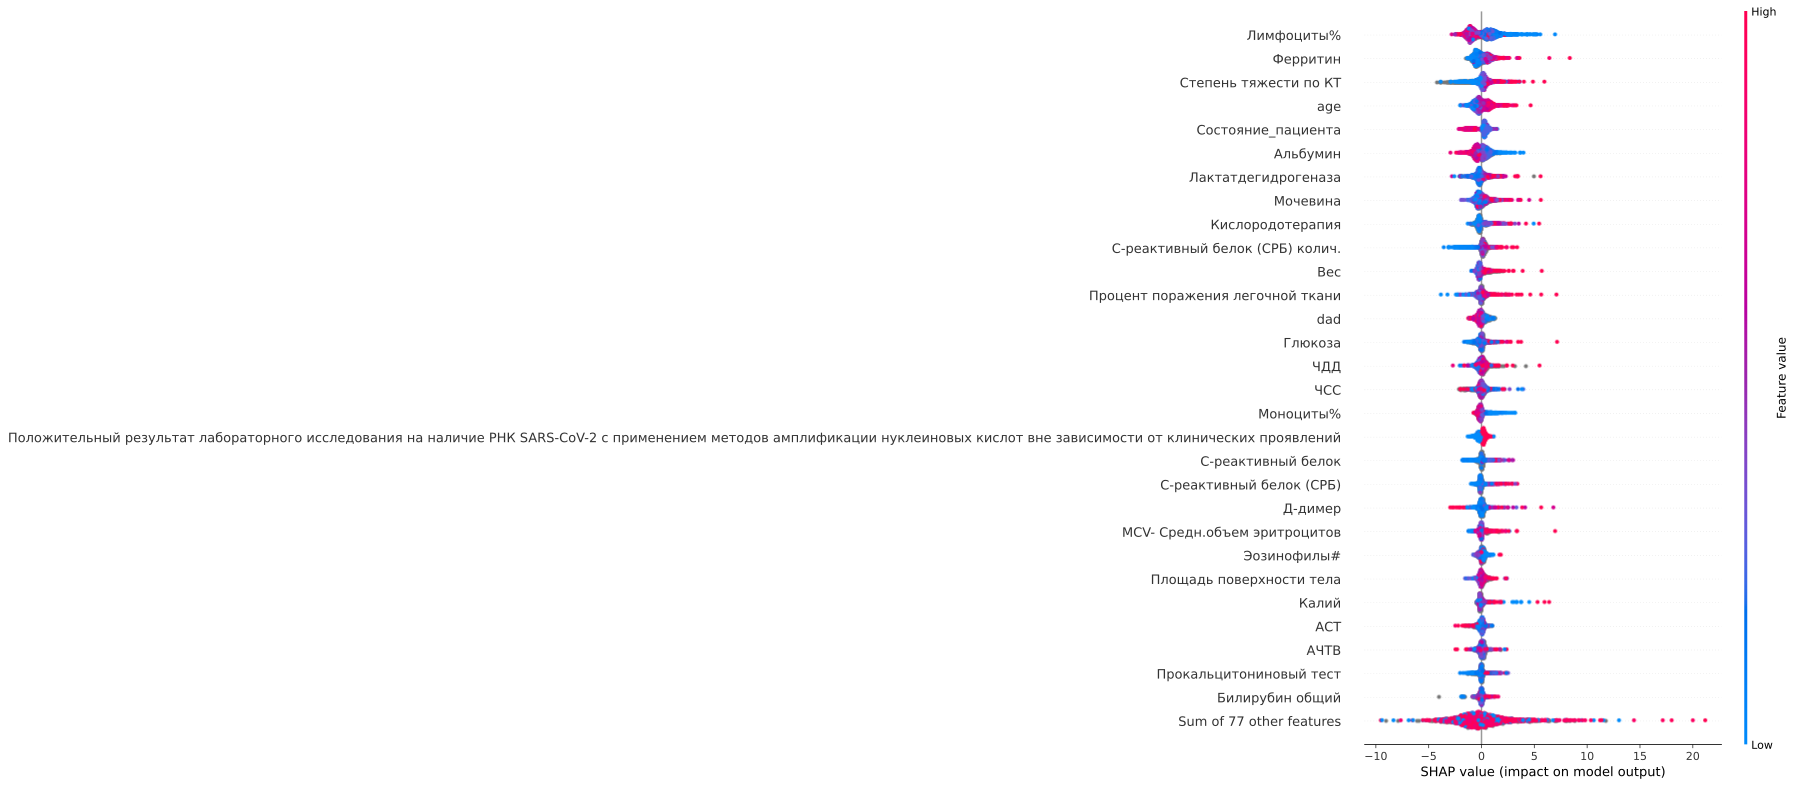

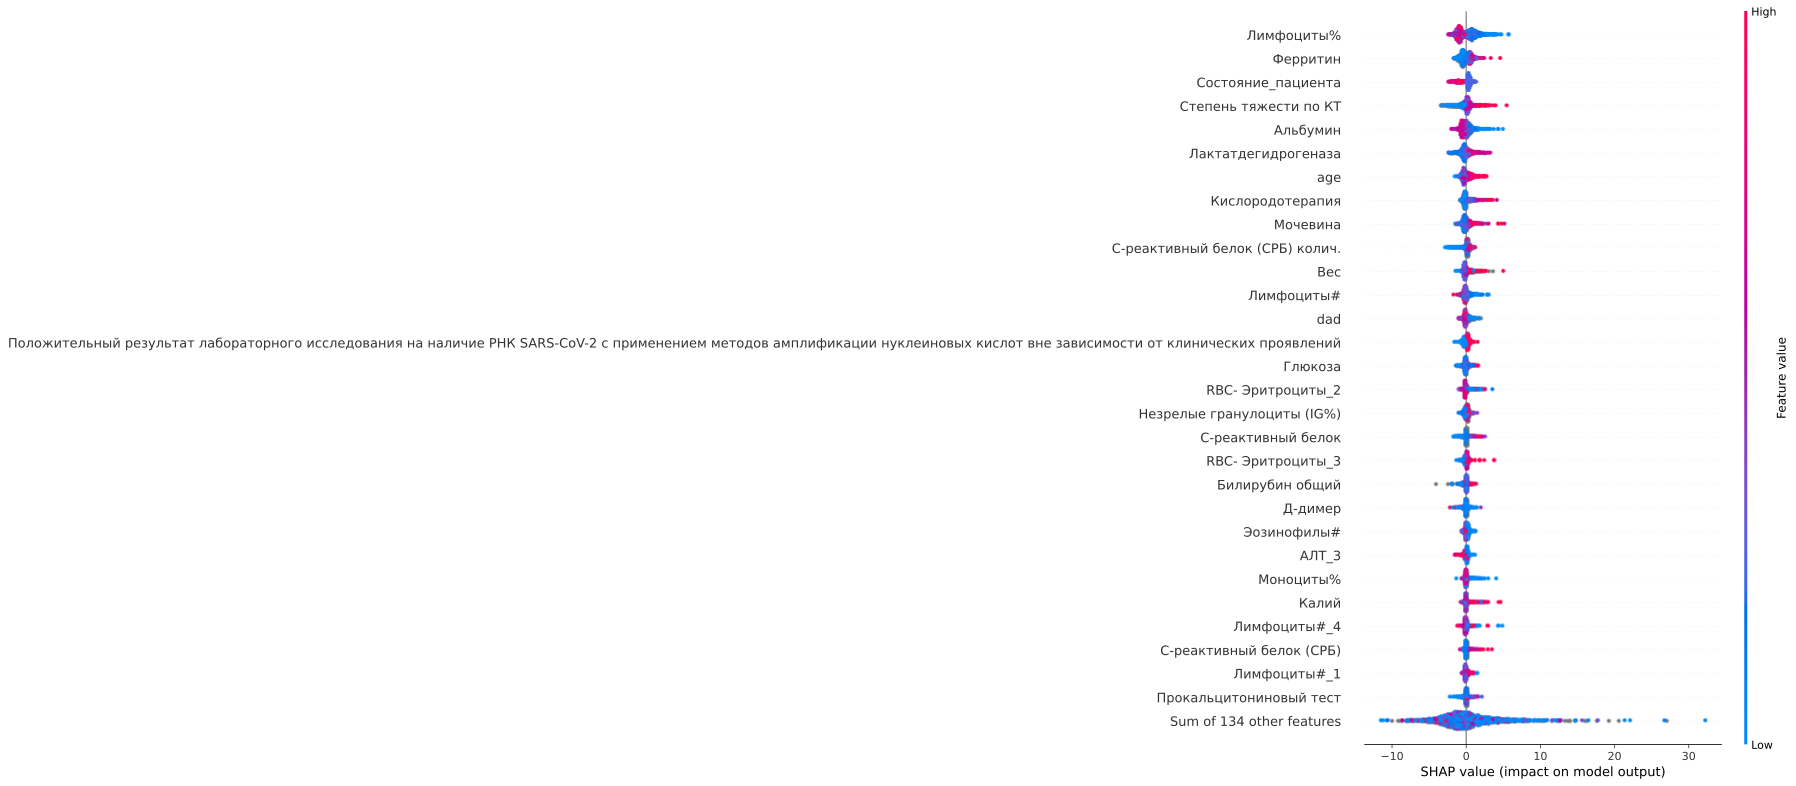

In [13]:
def selected_features(data,num_feats,targets):
    #Отбираем важные для прогноза признаки
    model=XGBRegressor()

    X = data.drop(targets+[],axis=1)
    y = data[targets[0]]

    model.fit(X,y)

    # explain the model's predictions using SHAP
    # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    # summarize the effects of all the features
    shap.plots.beeswarm(shap_values,max_display=30) 

    vals= np.abs(shap_values.values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)

    selected_features=feature_importance[:num_feats].col_name.to_list()

    #append targets
    [selected_features.append(tar) for tar in ['duration_treatment',"result"] if tar not in selected_features]
    
    return data[[c for c in data.columns if c in selected_features]]

#Отбираем признаки.    
#Определяем targets (фичи отбираем по первому таргету).
targets=['duration_treatment',"result"] #

dat_path="Data/Datasets/df_final.pkl"
dat_dinamic_path="Data/Datasets/df_final_dinamic.pkl"

dat=pd.read_pickle(dat_path)
dat_dinamic=pd.read_pickle(dat_dinamic_path)

#Selected columns
dat=selected_features(dat,15,targets)
dat_dinamic=selected_features(dat_dinamic,15,targets)

dat.to_pickle(dat_path)
dat_dinamic.to_pickle(dat_dinamic_path)

In [14]:
dat

,С-реактивный белок (СРБ) колич.,Состояние_пациента,Альбумин,Cтепень тяжести по КТ,Мочевина,Лимфоциты%,Рост,Вес,Кислородотерапия,Лактатдегидрогеназа,dad,Ферритин,Глюкоза,Процент поражения легочной ткани,result,duration_treatment,age
pat,,,,,,,,,,,,,,,,,
GACAM$К,0.53,3,NaN,1.0,NaN,34.5,162.0,64.0,NaN,NaN,80.0,102.7,NaN,18.0,1,8,54
GACAjущ,2.82,1,39.90,NaN,5.80,32.3,162.0,82.0,NaN,179.00,NaN,620.5,NaN,NaN,1,10,63
GACAmR>,NaN,1,43.50,2.0,4.40,9.2,155.0,78.0,NaN,500.00,69.0,287.2,7.67,NaN,1,29,59
GACAm5',NaN,3,32.63,3.0,10.17,4.1,163.0,60.0,7.0,324.96,84.0,NaN,5.90,72.0,1,15,80
GACAm^4,NaN,4,NaN,NaN,NaN,NaN,164.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GACAmQE,NaN,1,40.79,2.0,5.89,25.4,164.0,79.0,1.0,263.08,65.0,NaN,11.00,44.0,1,12,70
GACAlыз,NaN,4,NaN,2.0,NaN,NaN,1.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,2,13,80
GACAmy5,NaN,1,32.20,1.0,8.00,16.9,185.0,87.0,5.0,394.00,80.0,243.8,NaN,NaN,1,22,68


In [15]:
dat_dinamic

,Положительный результат лабораторного исследования на наличие РНК SARS-CoV-2 с применением методов амплификации нуклеиновых кислот вне зависимости от клинических проявлений,С-реактивный белок (СРБ) колич.,Состояние_пациента,Альбумин,Cтепень тяжести по КТ,Мочевина,Лимфоциты#,Лимфоциты%,Вес,Эозинофилы%,Кислородотерапия,Лактатдегидрогеназа,dad,Ферритин,result,duration_treatment,age
pat,,,,,,,,,,,,,,,,,
GACAM$К,1,0.53,3,NaN,1.0,NaN,1.10,34.5,64.0,0.7,NaN,NaN,80.0,102.7,1,8,54
GACAjущ,1,2.82,1,39.90,NaN,5.80,1.32,32.3,82.0,1.1,NaN,179.00,NaN,620.5,1,10,63
GACAmR>,0,NaN,1,43.50,2.0,4.40,1.72,9.2,78.0,0.0,NaN,500.00,69.0,287.2,1,29,59
GACAm5',1,NaN,3,32.63,3.0,10.17,0.46,4.1,60.0,NaN,7.0,324.96,84.0,NaN,1,15,80
GACAm^4,0,NaN,4,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,1,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GACAmQE,0,NaN,1,40.79,2.0,5.89,2.34,25.4,79.0,NaN,1.0,263.08,65.0,NaN,1,12,70
GACAlыз,0,NaN,4,NaN,2.0,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,2,13,80
GACAmy5,0,NaN,1,32.20,1.0,8.00,0.86,16.9,87.0,1.0,5.0,394.00,80.0,243.8,1,22,68


### Функция которая сохраняет метрики и прогнозы

In [16]:
#Определяем набор признаков, нужный для прогноза

#Определяем targets
targets=['duration_treatment',"result"]

#Определяем тип решаемой задачи для каждого target
types_task=["regression"]+["classification"]

#Определяем хранилище для данных
data_folder="Data/Datasets"

models={"regression":[XGBRegressor(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor()],
        "classification":[XGBClassifier(),DecisionTreeClassifier(),LogisticRegression(),RandomForestClassifier()]
}

models_names={
    "regression":["XGBRegressor","DecisionTreeRegressor","LinearRegression","RandomForestRegressor"],
    "classification":["XGBClassifier","DecisionTreeClassifier","LogisticRegression","RandomForestClassifier"]
}

models_not_need_replace_gaps=["XGBRegressor","XGBClassifier"]

#Объекты для хранения показателей качества
results_reg=pd.DataFrame(columns=["mod_name","dataset","mae","mse","tar"])
results_classif=pd.DataFrame(columns=["mod_name","dataset","accuracy","roc_auc","tar"])

#Считаем качество
for dataset in tqdm_notebook(os.listdir(data_folder)):
    if os.path.isfile(os.path.join(data_folder,dataset)):
        filename,extension=os.path.splitext(dataset)
        
        data=pd.read_pickle(os.path.join(data_folder,dataset))
#         pat_name_to_index(data) #B

        for tar in targets:

            dat=data.copy() #[features+targets]
            ind_target=targets.index(tar)
            type_task=types_task[ind_target] #Определяем тип задачи

            mods=models.copy()[type_task]
            mods_names=models_names.copy()[type_task] #Опрелеляем модели качество котороых будет тестироватся по типу задачи

#             if type_task == "regression":
#                 dat=replace_emissions(dat,[tar],[]) #Заменяем выбросы в таргете на None

            dat=dat.dropna(subset=[tar])
            dat=del_feat_with_one_val(dat) #Удаляем None и неиформативные переменные

#             if type_task == "classification":
#                 dat=categor_coding(dat,[tar],[],'LabelEncoder') #Кодируем категориальные переменные


            for ind_mod in tqdm_notebook(range(len(mods))):
                X = dat.drop(targets,axis=1)
                y = dat[tar]

                mod_name=mods_names[ind_mod]
                mod=mods[ind_mod]

                if mod not in models_not_need_replace_gaps:
                    X=replace_passies('median',X,X.columns.tolist())

                if type_task == "regression":

                    scoring=('r2',"neg_mean_squared_error","neg_mean_absolute_error")

                    scores = cross_validate(mod, X, y, cv=2,
                                            scoring=scoring)
                    
                    print("test_neg_mean_absolute_error",scores['test_neg_mean_absolute_error'])
                    print("test_neg_mean_squared_error",scores['test_neg_mean_squared_error'])
                    
                    mae=scores['test_neg_mean_absolute_error'].mean()
                    mse=scores['test_neg_mean_squared_error'].mean()

                    next_index=results_reg.shape[0]+1
                    results_reg.loc[next_index]=[mod_name,filename,-mae,-mse,tar]

                if type_task == "classification":
                    scoring=("balanced_accuracy","roc_auc_ovr_weighted")

                    scores = cross_validate(mod, X, y, cv=2,
                                            scoring=scoring)

                    accuracy=scores['test_balanced_accuracy'].mean()
                    roc_auc=scores['test_roc_auc_ovr_weighted'].mean()

                    next_index=results_classif.shape[0]+1
                    results_classif.loc[next_index]=[mod_name,filename,accuracy,roc_auc,tar]

            if type_task == "regression":
                #Кросс-валидация для Fedot
                metric1,metric2=fedot_cross_val(data.copy(),tar,type_task)

            if type_task == "regression":
                next_index=results_reg.shape[0]+1
                results_reg.loc[next_index]=["Fedot",filename,metric1,metric2,tar]
            
#             if type_task == "classification":
#                 next_index=results_classif.shape[0]+1
#                 results_classif.loc[next_index]=["Fedot",filename,metric1,metric2,tar]
            
            
#сохраняем результат
# save_result()

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

test_neg_mean_absolute_error [-5.44485085 -5.30042351]
test_neg_mean_squared_error [-59.93132326 -61.28667047]
test_neg_mean_absolute_error [-7.20178926 -7.01094527]
test_neg_mean_squared_error [-104.90159046 -101.2199005 ]
test_neg_mean_absolute_error [-5.16553806 -4.74578094]
test_neg_mean_squared_error [-55.12595337 -47.5720725 ]
test_neg_mean_absolute_error [-5.10321769 -4.67721393]
test_neg_mean_squared_error [-55.14304608 -49.36211761]


  0%|          | 0/2 [00:00<?, ?it/s]

Composition started. Parameters tuning: True. Set of candidate models: ['adareg', 'catboostreg', 'dtreg', 'gbr', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'rfr', 'ridge', 'sgdr', 'treg', 'xgbreg', 'scaling', 'normalization', 'pca', 'poly_features', 'one_hot_encoding', 'ransac_lin_reg', 'ransac_non_lin_reg', 'rfe_lin_reg', 'rfe_non_lin_reg']. Time limit: 1 min
Pipeline composition started
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700153.360195\0\051794d9-5a56-4845-b3e4-8ef308740be8\051794d9-5a56-4845-b3e4-8ef308740be8.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700153.360195\0\f950847a-2b4f-4e75-81a7-02d0a0385da7\f950847a-2b4f-4e75-81a7-02d0a0385da7.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700153.360195\0\eb0d667e-332f-4455-b662-ca9536c8acca\eb0d667e-332f-4455-b662-ca9536c8acca.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700153.360195\0\78ba01fd-db

 23%|██████████▋                                   | 232/1000 [00:13<00:43, 17.55trial/s, best loss: 4.578036547098895]

 23%|██████████▊                                   | 234/1000 [00:13<00:43, 17.42trial/s, best loss: 4.578036547098895]

 24%|██████████▊                                   | 236/1000 [00:13<00:43, 17.48trial/s, best loss: 4.578036547098895]

 24%|██████████▉                                   | 238/1000 [00:14<00:43, 17.44trial/s, best loss: 4.578036547098895]

 24%|███████████                                   | 240/1000 [00:14<00:43, 17.44trial/s, best loss: 4.578036547098895]

 24%|███████████▏                                  | 242/1000 [00:14<00:43, 17.38trial/s, best loss: 4.578036547098895]

 24%|███████████▏                                  | 244/1000 [00:14<00:43, 17.32trial/s, best loss: 4.578036547098895]

 25%|███████████▎                                  | 246/1000 [00:14<00:43, 17.28trial/s, best loss: 4.578036547098895]

 25%|███████████▍               

 49%|██████████████████████▍                       | 488/1000 [00:28<00:29, 17.61trial/s, best loss: 4.578036372425026]

 49%|██████████████████████▌                       | 490/1000 [00:28<00:29, 17.49trial/s, best loss: 4.578036372425026]

 49%|██████████████████████▋                       | 492/1000 [00:28<00:29, 17.14trial/s, best loss: 4.578036372425026]

 49%|██████████████████████▋                       | 494/1000 [00:29<00:29, 17.26trial/s, best loss: 4.578036372425026]

 50%|██████████████████████▊                       | 496/1000 [00:29<00:29, 17.33trial/s, best loss: 4.578036372425026]

 50%|██████████████████████▉                       | 498/1000 [00:29<00:28, 17.58trial/s, best loss: 4.578036372425026]

 50%|███████████████████████                       | 500/1000 [00:29<00:28, 17.46trial/s, best loss: 4.578036372425026]

 50%|███████████████████████                       | 502/1000 [00:29<00:28, 17.42trial/s, best loss: 4.578036372425026]

 50%|███████████████████████▏   

 25%|███████████▌                                  | 252/1000 [00:11<00:35, 20.84trial/s, best loss: 5.662427738116981]

 26%|███████████▋                                  | 255/1000 [00:11<00:36, 20.53trial/s, best loss: 5.662427738116981]

 26%|███████████▊                                  | 258/1000 [00:11<00:35, 20.69trial/s, best loss: 5.662427738116981]

 26%|████████████                                  | 261/1000 [00:11<00:36, 20.41trial/s, best loss: 5.662427738116981]

 26%|████████████▏                                 | 264/1000 [00:11<00:35, 20.67trial/s, best loss: 5.662427738116981]

 27%|████████████▎                                 | 267/1000 [00:11<00:35, 20.89trial/s, best loss: 5.662427738116981]

 27%|████████████▍                                 | 270/1000 [00:12<00:35, 20.79trial/s, best loss: 5.662427738116981]

 27%|████████████▌                                 | 273/1000 [00:12<00:35, 20.77trial/s, best loss: 5.662427738116981]

 28%|████████████▋              

 57%|██████████████████████████▍                   | 574/1000 [00:28<00:25, 16.69trial/s, best loss: 5.662427738116981]

 58%|██████████████████████████▍                   | 576/1000 [00:28<00:25, 16.89trial/s, best loss: 5.662427738116981]

 58%|██████████████████████████▌                   | 578/1000 [00:28<00:25, 16.84trial/s, best loss: 5.662427738116981]

 58%|██████████████████████████▋                   | 580/1000 [00:28<00:25, 16.70trial/s, best loss: 5.662427738116981]

 58%|██████████████████████████▊                   | 582/1000 [00:28<00:25, 16.67trial/s, best loss: 5.662427738116981]

 58%|██████████████████████████▊                   | 584/1000 [00:28<00:25, 16.40trial/s, best loss: 5.662427738116981]

 59%|██████████████████████████▉                   | 586/1000 [00:28<00:25, 16.32trial/s, best loss: 5.662427738116981]

 59%|███████████████████████████                   | 588/1000 [00:29<00:24, 16.69trial/s, best loss: 5.662427738116981]

 59%|███████████████████████████

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

test_neg_mean_absolute_error [-5.60256215 -5.19079244]
test_neg_mean_squared_error [-67.33322598 -57.98875524]
test_neg_mean_absolute_error [-6.61033797 -6.5119403 ]
test_neg_mean_squared_error [-91.83499006 -90.17537313]
test_neg_mean_absolute_error [-5.13515354 -4.72319765]
test_neg_mean_squared_error [-54.7864379 -47.1189259]
test_neg_mean_absolute_error [-5.13565048 -4.7583    ]
test_neg_mean_squared_error [-55.75019389 -49.56214732]


  0%|          | 0/2 [00:00<?, ?it/s]

Composition started. Parameters tuning: True. Set of candidate models: ['adareg', 'catboostreg', 'dtreg', 'gbr', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'rfr', 'ridge', 'sgdr', 'treg', 'xgbreg', 'scaling', 'normalization', 'pca', 'poly_features', 'one_hot_encoding', 'ransac_lin_reg', 'ransac_non_lin_reg', 'rfe_lin_reg', 'rfe_non_lin_reg']. Time limit: 1 min
Pipeline composition started
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700265.146776\0\84a96962-574c-4b44-9fb9-3f4ffa23488b\84a96962-574c-4b44-9fb9-3f4ffa23488b.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700265.146776\0\457ef1a8-57dd-4d1d-a3a0-756013d4df74\457ef1a8-57dd-4d1d-a3a0-756013d4df74.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700265.146776\0\c07cc6d7-0180-4b9f-b2b8-b3e223801240\c07cc6d7-0180-4b9f-b2b8-b3e223801240.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700265.146776\0\1e60052d-9a

 12%|█████▎                                        | 115/1000 [00:14<01:46,  8.34trial/s, best loss: 4.516007269624618]

 12%|█████▎                                        | 116/1000 [00:14<01:49,  8.08trial/s, best loss: 4.516007269624618]

 12%|█████▍                                        | 117/1000 [00:15<01:55,  7.67trial/s, best loss: 4.516007269624618]

 12%|█████▍                                        | 119/1000 [00:15<01:45,  8.35trial/s, best loss: 4.516007269624618]

 12%|█████▌                                        | 120/1000 [00:15<01:43,  8.49trial/s, best loss: 4.516007269624618]

 12%|█████▌                                        | 122/1000 [00:15<01:36,  9.11trial/s, best loss: 4.516007269624618]

 12%|█████▋                                        | 123/1000 [00:15<01:38,  8.91trial/s, best loss: 4.516007269624618]

 12%|█████▋                                        | 124/1000 [00:15<01:37,  8.98trial/s, best loss: 4.516007269624618]

 12%|█████▊                     

The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700318.191617\0\c57311e5-5347-4701-92ae-74af79e6e738\c57311e5-5347-4701-92ae-74af79e6e738.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700318.191617\0\80abfb16-529f-4448-99df-471e96dc5630\80abfb16-529f-4448-99df-471e96dc5630.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700318.191617\0\aeee244a-a32d-4358-b824-f00547acba25\aeee244a-a32d-4358-b824-f00547acba25.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700318.191617\0\2dbc9066-9cf9-42e2-9e5a-d3165e07c871\2dbc9066-9cf9-42e2-9e5a-d3165e07c871.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700318.191617\0\a7aadb3a-266b-441d-9f2b-fa3ffd5042cf\a7aadb3a-266b-441d-9f2b-fa3ffd5042cf.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700318.191617\0\1fa7b2f4-9c59-422e-a512-e2a4815cae55\1fa7b2f4-9c59-422e-a512

 14%|██████▍                                       | 140/1000 [00:17<01:30,  9.53trial/s, best loss: 5.209079122383113]

 14%|██████▍                                       | 141/1000 [00:17<01:38,  8.73trial/s, best loss: 5.209079122383113]

 14%|██████▌                                       | 143/1000 [00:17<01:33,  9.17trial/s, best loss: 5.192436970447846]

 14%|██████▌                                       | 144/1000 [00:18<01:32,  9.24trial/s, best loss: 5.192436970447846]

 14%|██████▋                                       | 145/1000 [00:18<01:31,  9.38trial/s, best loss: 5.192436970447846]

 15%|██████▋                                       | 146/1000 [00:18<01:32,  9.28trial/s, best loss: 5.192436970447846]

 15%|██████▊                                       | 147/1000 [00:18<01:33,  9.11trial/s, best loss: 5.192436970447846]

 15%|██████▊                                       | 148/1000 [00:18<01:35,  8.89trial/s, best loss: 5.192436970447846]

 15%|██████▊                    

  0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
#Сохраняем измеренные качества работы
results_reg.to_csv("Data/results_reg_0.csv",index=None)
results_classif.to_csv("Data/results_classif_0.csv",index=None)

In [18]:
#Определяем targets
targets=['duration_treatment']

#Определяем тип решаемой задачи для каждого target
types_task=["regression"]

#Достаем результаты проверки качества
results_reg=pd.read_csv("Data/results_reg_0.csv")
results_classif=pd.read_csv("Data/results_classif_0.csv")

#Рисуем графики для регрессии
for ind in tqdm_notebook(range(len(targets))):
    tar=targets[ind]
    type_task=types_task[ind]
    
    fig = go.Figure()

    for mod_name in models_names[type_task]+["Fedot"]:

        mod_res=results_reg[(results_reg.mod_name==mod_name)&(results_reg.tar==tar)].sort_values("dataset")

        fig.add_trace(go.Scatter(x=mod_res.dataset, y=mod_res.mae, name=f'{mod_name} MAE',
                                 hovertext="text",hoverinfo="y")) #

#         fig.add_trace(go.Scatter(x=mod_res.dataset, y=mod_res.mse, name=f'{mod_name} MSE',
#                                  hovertext="text",hoverinfo="y")) #,dash='dot'

    fig.update_layout(title=f'Качество прогноза {tar} по кросс-валидации ',
                      xaxis_title='Тип прогноза',
                      yaxis_title='Качество прогноза')

    fig.show()

  0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
results_classif

,mod_name,dataset,accuracy,roc_auc,tar
0,XGBClassifier,df_final,0.609907,0.892909,result
1,DecisionTreeClassifier,df_final,0.620795,0.770629,result
2,LogisticRegression,df_final,0.339285,0.750554,result
3,RandomForestClassifier,df_final,0.613816,0.903641,result
4,XGBClassifier,df_final_dinamic,0.599888,0.905779,result
5,DecisionTreeClassifier,df_final_dinamic,0.631468,0.776269,result
6,LogisticRegression,df_final_dinamic,0.348587,0.731238,result
7,RandomForestClassifier,df_final_dinamic,0.605462,0.899623,result


#### Рисуем графики для классификации

In [20]:
#Определяем targets
targets=['result']

for tar in tqdm_notebook(targets):

    fig = go.Figure()

    for mod_name in models_names["classification"]+["Fedot"]:

        mod_res=results_classif[(results_classif.mod_name==mod_name)&(results_classif.tar==tar)].sort_values("dataset")

        fig.add_trace(go.Scatter(x=mod_res.dataset, y=mod_res.roc_auc, name=f'{mod_name} ROC-AUC',
                                 hovertext="text",hoverinfo="y")) #

#         fig.add_trace(go.Scatter(x=mod_res.dataset, y=mod_res.accuracy, name=f'{mod_name} Accuracy',
#                                  hovertext="text",hoverinfo="y")) #

    fig.update_layout(title=f'Качество прогноза {tar} по кросс-валидации ',
                      xaxis_title='Качество прогноза',
                      yaxis_title='Дней используем')

    fig.show()

  0%|          | 0/1 [00:00<?, ?it/s]

#### Рисуем ROC кривые для всех моделей и двух датасетов

In [21]:
np.random.seed(1)

#Определяем хранилище для данных
data_folder="Data/Datasets"
target="result"
other_targets=['duration_treatment'] #,"t_point"

#Считаем качество
for dataset in tqdm_notebook(os.listdir(data_folder)):
    if os.path.isfile(os.path.join(data_folder,dataset)):
        data=pd.read_pickle(os.path.join(data_folder,dataset))
        
        data=data.dropna(subset=[target])
        data=del_feat_with_one_val(data) #Удаляем None и неиформативные переменные
            
        create_several_ROC_curve(data,target,other_targets)

  0%|          | 0/2 [00:00<?, ?it/s]

Запуск модели XGBClassifier
Запуск модели LogisticRegression
Запуск модели RandomForestClassifier
Запуск модели Fedot
Composition started. Parameters tuning: True. Set of candidate models: ['bernb', 'catboost', 'dt', 'knn', 'lda', 'lgbm', 'logit', 'qda', 'rf', 'xgboost', 'scaling', 'normalization', 'pca', 'poly_features', 'one_hot_encoding', 'rfe_lin_class', 'rfe_non_lin_class']. Time limit: 1 min
Pipeline composition started
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700368.696437\0\4c8c2921-0675-4d86-b740-b73ea9ed938c\4c8c2921-0675-4d86-b740-b73ea9ed938c.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700368.696437\0\64ce308f-aac7-41e6-a026-9c7747c85b37\64ce308f-aac7-41e6-a026-9c7747c85b37.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700368.696437\0\1d66a260-0f12-46c4-ba57-0298271eec42\1d66a260-0f12-46c4-ba57-0298271eec42.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composin

 11%|████▋                                       | 106/1000 [00:30<04:13,  3.52trial/s, best loss: -0.8938473226019773]
Hyperparameters optimization finished
Return init pipeline due to the fact that obtained metric -0.894 smaller than initial (- 5% deviation) -0.803
Model composition finished
y_onehot Fedot          0  1  2
pat             
GACAmYu  0  1  0
GACAFQH  0  0  1
GACAm]Ж  0  1  0
GACAjф(  0  1  0
GACAmLd  0  0  1
...     .. .. ..
GACAlшя  0  1  0
GACAjь3  0  1  0
GACAm{ш  0  1  0
GACAmAУ  0  1  0
GACAjы6  0  1  0

[503 rows x 3 columns]


Запуск модели XGBClassifier
Запуск модели LogisticRegression
Запуск модели RandomForestClassifier
Запуск модели Fedot
Composition started. Parameters tuning: True. Set of candidate models: ['bernb', 'catboost', 'dt', 'knn', 'lda', 'lgbm', 'logit', 'qda', 'rf', 'xgboost', 'scaling', 'normalization', 'pca', 'poly_features', 'one_hot_encoding', 'rfe_lin_class', 'rfe_non_lin_class']. Time limit: 1 min
Pipeline composition started
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700420.710785\0\809ba8ef-8797-4197-85f5-407c8c0d075c\809ba8ef-8797-4197-85f5-407c8c0d075c.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700420.710785\0\51542c05-172f-4a6c-8906-54f956d2ab8a\51542c05-172f-4a6c-8906-54f956d2ab8a.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composing_history_1649700420.710785\0\5c9c33c1-7d68-4455-a7d3-7eb8fef35221\5c9c33c1-7d68-4455-a7d3-7eb8fef35221.json.
The pipeline saved in the path: C:\Users\Илья\Fedot\composin